# Thinking probabilistically-- Discrete variables

### Generating random numbers using the np.random module

In [3]:
import numpy as np
import matplotlib.pyplot as plt

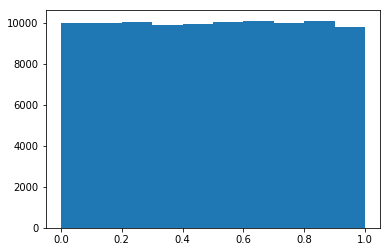

In [4]:
np.random.seed(42)

random_numbers = np.empty(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

_ = plt.hist(random_numbers)
plt.show()

### The np.random module and Bernoulli trials

In [12]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    
    n_success = 0
    for i in range(n):
        random_number = np.random.random()
        if random_number < p:
            n_success += 1
    return n_success

### How many defaults might we expect?

In [13]:
np.random.seed(42)

In [14]:
n_defaults = np.empty(1000)

In [15]:
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

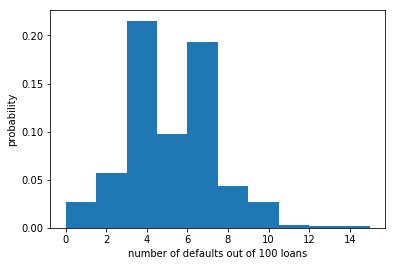

In [17]:
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')
plt.show()

In [18]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### Will the bank fail?

In [19]:
x, y = ecdf(n_defaults)

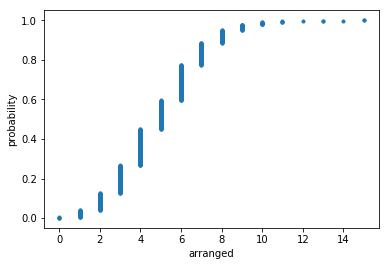

In [20]:
_ = plt.plot(x,y,marker='.', linestyle='none')
_ = plt.xlabel('arranged')
_ = plt.ylabel('probability')
plt.show()

In [21]:
n_lose_money = np.sum(n_defaults >= 10)

In [22]:
print('Probability of losing money =', n_lose_money / len(n_defaults))

Probability of losing money = 0.022


### Sampling out of the Binomial distribution

In [25]:
np.random.seed(42)

In [26]:
n_defaults = np.random.binomial(100, 0.05, 10000)

In [27]:
x, y = ecdf(n_defaults)

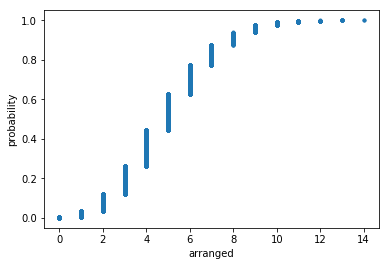

In [28]:
_ = plt.plot(x,y,marker='.', linestyle='none')
_ = plt.xlabel('arranged')
_ = plt.ylabel('probability')
plt.show()

### Plotting the Binomial PMF

In [30]:
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

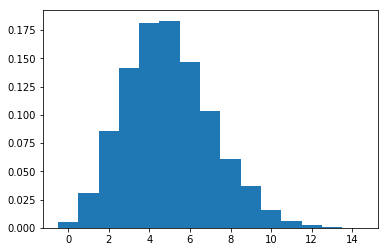

In [31]:
plt.hist(n_defaults, density=True, bins=bins)
plt.show()

### Relationship between Binomial and Poisson distributions

In [32]:
np.random.seed(42)

In [33]:
samples_poisson = np.random.poisson(10, 10000)

In [35]:
print('Poisson: ', np.mean(samples_poisson), np.std(samples_poisson))

Poisson:  10.0186 3.144813832327758


In [38]:
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], 10000)
    print('n =', n[i], 'Binom:', np.mean(samples_binomial), np.std(samples_binomial))

n = 20 Binom: 10.0003 2.218400304273329
n = 100 Binom: 9.9974 2.9637802280196146
n = 1000 Binom: 10.032 3.137925429324285


### Was 2015 anomalous?

In [39]:
n_nohiters = np.random.poisson(251/115, 10000)

In [41]:
n_large = np.sum(n_nohiters >= 7)

In [42]:
p_large = n_large/len(n_nohiters)

In [43]:
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0055
